In [35]:
import numpy as np
import re
import networkx as nx
import seaborn as sns
from collections import OrderedDict, Counter, defaultdict
from scipy.spatial.distance import cosine
%matplotlib inline

In [2]:
def check_t8(access):
    if len(access) == 5:
        return -1
    else:
        return int(access[6])

In [3]:
dictval = OrderedDict()

with open('labeled-vertices.train.tsv') as training:
    i = 0
    for line in training:
        if i%2000000 == 0:
            print(i)
        access = re.findall('\d+', line)

        i+=1
        dictval[int(access[0])] = (int(access[2]), int(access[4]), check_t8(access))

0
2000000
4000000


In [4]:
check = Counter()
all_lines = []
i = 0
with open('network.tsv') as file:
    for x in file:
        if i%2000000 == 0:
            print(i)
        y = [int(a) for a in x.split()]
        check.update(y)
        all_lines.append((y[0], y[1]))
        i+=1

0
2000000
4000000
6000000
8000000
10000000
12000000
14000000
16000000
18000000
20000000
22000000
24000000
26000000
28000000
30000000


In [5]:
list4559 = [x for x in all_lines if 4559 in x and x[0] in dictval.keys() and x[1] in dictval.keys()]

In [6]:
hom = nx.Graph()
for a in list4559:
    hom.add_edge(a[0], a[1])

In [7]:
ego = [x for x in all_lines if x[0] in hom.nodes() or x[1] in hom.nodes()]
ego = [x for x in ego if x[0] in dictval.keys() and x[1] in dictval.keys()]

In [8]:
ego_g = nx.Graph()
for a in ego:
    ego_g.add_edge(a[0], a[1])

#### Work area

In [10]:
vectorarray = sorted(set([dictval[x] for x in ego_g.nodes()])) #All unique classes in subgraph

In [31]:
target_nodes = [x for x in hom.neighbors(4559)] #node and neighbors to iterate over
target_nodes.append(4559)

In [12]:
a = [1,2,3]
for x,y in enumerate(a):
    print(x,y)

0 1
1 2
2 3


In [32]:
def vector_gen(node):
    vec = np.zeros(len(vectorarray))
    
    total_nn = len([x for x in ego_g.neighbors(node)]) #Total number of neighbors
    neighborclass_count = Counter([dictval[x] for x in ego_g.neighbors(node)])#Count of each class in neighbor
    
    for num, value in enumerate(vectorarray):
        vec[num] = neighborclass_count[value]/total_nn
    vec[vectorarray.index(dictval[node])] += 0.25
    
    return vec

In [33]:
vectordict = {}

for x in target_nodes:
    vectordict[x] = vector_gen(x)

In [36]:
results = []

for x in list4559:
    a = 1-cosine(vectordict[x[0]], vectordict[x[1]])
    print(x, a)
    results.append(a)

(1721592, 4559) 0.8897143299734238
(2712303, 4559) 0.8897143299734238
(2562176, 4559) 0.8897143299734238
(2056015, 4559) 0.13877325286724984
(4559, 32744) 0.046708802737160715
(4559, 1619343) 0.8897143299734238
(5495420, 4559) 0.3434007220951403
(5134411, 4559) 0.0978462046207691
(1708923, 4559) 0.5278634311738035
(5797181, 4559) 0.11867338885718692
(3284992, 4559) 0.10203900418207268
(4559, 6281209) 0.10267420795225535
(4559, 1523858) 0.07508427269300266
(4559, 3538091) 0.1377079533885759
(4559, 3427553) 0.8897143299734238
(4427363, 4559) 0.09592455440142567
(5834521, 4559) 0.8897143299734238
(383399, 4559) 0.5252226817624733
(4559, 2115142) 0.1084035730227324
(4559, 6225168) 0.21536062236411635
(496170, 4559) 0.12749962403620851
(44703, 4559) 0.10782782799611068
(2580287, 4559) 0.10811926957111462
(4559, 420144) 0.3437192199046206
(4432497, 4559) 0.06885189289184901
(4559, 3070437) 0.2349229344425643
(678792, 4559) 0.1090910785793805
(4559, 5204270) 0.10375267561041435
(2732114, 4559

(68423, 4559) 0.8897143299734238
(5412359, 4559) 0.08850469947912598
(291595, 4559) 0.7532878170568591
(4559, 3860630) 0.43547983885404506
(3512378, 4559) 0.8897143299734238
(4559, 1034593) 0.21325412507974384
(4559, 6310991) 0.035796541145382554
(5503493, 4559) 0.08556024331823497
(4559, 4618160) 0.08051950575860589
(4559, 3952198) 0.534479312220827
(2870801, 4559) 0.7421025214719857
(3138569, 4559) 0.42531025773404263
(3911048, 4559) 0.8897143299734238
(851724, 4559) 0.3658567575591132
(5993019, 4559) 0.7142689753042579
(2842292, 4559) 0.8897143299734238
(4559, 3389092) 0.2989696304632512
(4648902, 4559) 0.42531025773404263
(4559, 4075314) 0.2049702233604499
(3190320, 4559) 0.8897143299734238
(5932830, 4559) 0.8897143299734238
(4559, 4014298) 0.42484082036347515
(1165153, 4559) 0.11371291852821797
(1857450, 4559) 0.21976511668598597
(4559, 1482346) 0.0856532997499263
(4559, 236325) 0.12930418431027035
(4559, 314076) 0.20060190260036848
(2786116, 4559) 0.4440877525567376
(4349105, 455

(1013483, 4559) 0.317577523433172
(4070910, 4559) 0.2547167728584787
(4567404, 4559) 0.8897143299734238
(4559, 4216567) 0.146609600670505
(3537050, 4559) 0.32491726038711777
(5694364, 4559) 0.7191586523337237
(5234811, 4559) 0.2798104171550724
(4559, 408508) 0.511535443082565
(5219150, 4559) 0.8897143299734238
(3680940, 4559) 0.08840784919321854
(4559, 2846889) 0.3455998649159535
(2187370, 4559) 0.4473738141507093
(5089390, 4559) 0.08011280437332702
(1177779, 4559) 0.8897143299734238
(3847909, 4559) 0.6784750490182453
(3997621, 4559) 0.026044238563056932
(3713723, 4559) 0.0563995939774552
(3499795, 4559) 0.09562182389333307
(6302832, 4559) 0.4767947327169557
(4907531, 4559) 0.8897143299734238
(4559, 363130) 0.8897143299734238
(4559, 4312674) 0.42484082036347515
(4559, 3968650) 0.7550807364496266
(5344307, 4559) 0.15098597226894428
(6199872, 4559) 0.05205352131056262
(2288412, 4559) 0.12977469244581563
(4084391, 4559) 0.02462571389239565
(1890328, 4559) 0.03813934196991675
(59896, 4559)

(4559, 3493546) 0.2319104819839184
(4559, 6355185) 0.14663351654324075
(5839475, 4559) 0.8897143299734238
(4243256, 4559) 0.054049496955391185
(4559, 3689815) 0.07064885019804978
(4559, 122534) 0.22273025941729208
(4840429, 4559) 0.8897143299734238
(4191971, 4559) 0.8210896119479701
(1889890, 4559) 0.8897143299734238
(4132195, 4559) 0.14387969272549206
(4559, 4425470) 0.29321201275818143
(1596280, 4559) 0.5474557627990244
(5343444, 4559) 0.42577969510461
(4559, 6201725) 0.46929972196459613
(4793089, 4559) 0.06503960380378493
(4559, 3678188) 0.8897143299734238
(1710193, 4559) 0.1401458513371936
(4559, 4878517) 0.10494762307887884
(1912837, 4559) 0.6046650555715178
(4559, 5059393) 0.20687444060673654
(4559, 1139432) 0.8897143299734238
(4559, 4389819) 0.6745062564414721
(4559, 5608917) 0.08147602504336715
(4964573, 4559) 0.052290919410660885
(4559, 5296057) 0.013507383175376364
(4613063, 4559) 0.8897143299734238
(2887867, 4559) 0.23078412476832344
(4559, 4045024) 0.8897143299734238
(18191

(4559, 4558016) 0.06348206204646212
(4559, 4220768) 0.31240407177508056
(2233164, 4559) 0.7715106145980393
(3943622, 4559) 0.448847276038133
(979934, 4559) 0.1291897217917961
(2924066, 4559) 0.930424868464539
(6482827, 4559) 0.26962612576294354
(4559, 1744265) 0.026285684863036063
(5286489, 4559) 0.11543584789974881
(6018985, 4559) 0.129217529269523
(4559, 2904369) 0.06323812775731086
(3744886, 4559) 0.011200317723344733
(1820757, 4559) 0.14243780833883557
(4559, 3228590) 0.08346527901404122
(4377027, 4559) 0.4304740688102837
(66005, 4559) 0.27581439215175574
(4559, 2542101) 0.5860502816163651
(4559, 3387997) 0.11343306804007691
(4056798, 4559) 0.5102189915746318
(4559, 5897055) 0.06266795971598971
(689211, 4559) 0.23225738022728892
(4559, 2280117) 0.15856674339790888
(814115, 4559) 0.1785845728087886
(5361879, 4559) 0.08380927772642355
(4559, 1604787) 0.07028125309845668
(4559, 4940089) 0.08626422731483185
(3789254, 4559) 0.1973903403705084
(4559, 5402459) 0.10335731938081794
(3138989

(4559, 1405712) 0.356256853313507
(4433945, 4559) 0.15561549023972587
(4559, 1616438) 0.26260838304824585
(6330360, 4559) 0.19556152177445107
(4559, 3747863) 0.15232054600213452
(4559, 305562) 0.422869754850117
(6576320, 4559) 0.5320465249684818
(3891439, 4559) 0.3736785227207219
(4559, 6531274) 0.19901925832431044
(4559, 775073) 0.125051055884425
(5414929, 4559) 0.1185613315428703
(1267370, 4559) 0.521135469724525
(4559, 282702) 0.07609709086726657
(134560, 4559) 0.15740707408415677
(865730, 4559) 0.11357545971603578
(4559, 1042702) 0.17452077763632123
(4559, 2467094) 0.1288604069699577
(3522110, 4559) 0.34265352106486535
(4559, 2706530) 0.9739260648037825
(4559, 4982648) 0.24877744760887655
(6372285, 4559) 0.2317092797874385
(2324720, 4559) 0.23679415260249792
(6247779, 4559) 0.07478143360973177
(2225322, 4559) 0.06755130377640595
(4559, 641244) 0.11854701142025881
(4559, 1968774) 0.09616330911012949
(2178805, 4559) 0.06010297365684003
(4559, 2651005) 0.08250172673624856
(4559, 54529

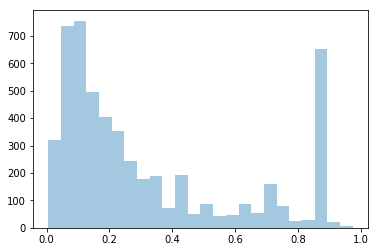

In [38]:
sns.distplot(results,kde=False)